In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


### Zadanie z Komputerowej analizy szeregów czasowych
Dla danych ze strony www narysuj wykres rozproszenia, traktując pierwszą kolumnę jak
zmienną objaśniającą, a drugą jako zmienną objaśnianą. Znajdź przybliżoną zależność funkcyjną pomiędzy danymi.

<ipython-input-59-f17fdbdb3151>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('dane1zad.txt', sep = '  ')


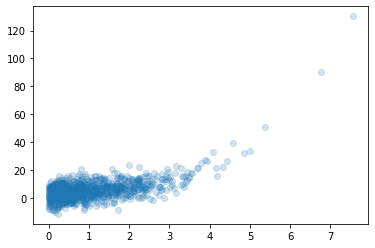

In [59]:
df = pd.read_csv('dane1zad.txt', sep = '  ')

x_list = df['x'].values.tolist()
y_list = df['y'].values.tolist()

#x_list.sort()
#y_list.sort()
plt.scatter(x_list, y_list, alpha= 0.2)
plt.show()


In [43]:
p_list = []
for i in range(5):
    print(i+1)
    p_list.append(np.polyfit(x_list, y_list, i+1))

print(p_list)

1
2
3
4
5
[array([4.91045846, 0.87760015]), array([ 2.05990324, -2.6214519 ,  4.56500938]), array([ 0.40444854, -1.3179017 ,  3.65908544,  2.55617206]), array([-2.79569969e-03,  4.38678568e-01, -1.43794402e+00,  3.78984610e+00,
        2.52763164e+00]), array([ 1.89691446e-03, -3.26104968e-02,  5.94686737e-01, -1.75848486e+00,
        4.02236542e+00,  2.49076261e+00])]


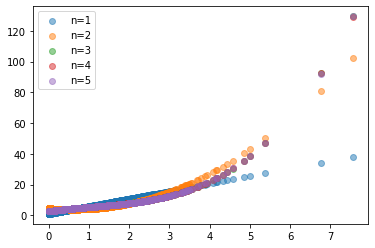

In [56]:
y_aprox_list = []
for j in range(len(p_list)):
    y_aprox_list.append(np.polyval(p_list[j], x_list))

plt.scatter(x_list, y_aprox_list[0], label = 'n=1', alpha= 0.5)
plt.scatter(x_list, y_aprox_list[1], label = 'n=2', alpha= 0.5)
plt.scatter(x_list, y_aprox_list[2], label = 'n=3', alpha= 0.5)
plt.scatter(x_list, y_aprox_list[3], label = 'n=4', alpha= 0.5)
plt.scatter(x_list, y_aprox_list[4], label = 'n=5', alpha= 0.5)
plt.legend()
plt.show()

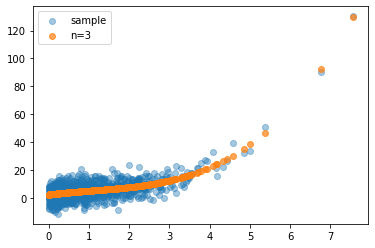

In [74]:
plt.scatter(x_list, y_list, label = 'sample', alpha= 0.4)
plt.scatter(x_list, y_aprox_list[2], label = 'n=3', alpha= 0.7)
plt.legend()
plt.show()

In [45]:
def abs_er(y, y_aprox):
    delta = 0
    for i in range(len(y)):
        delta += np.abs(y[i]-y_aprox[i])
    return delta

In [46]:
#błąd bezwzględny
print(abs_er(y_list, y_aprox_list[0]))
print(abs_er(y_list, y_aprox_list[1]))
print(abs_er(y_list, y_aprox_list[2]))
print(abs_er(y_list, y_aprox_list[3]))
print(abs_er(y_list, y_aprox_list[4]))

4314.200929715361
4044.674008351242
3904.901839073069
3905.5140732402742
3904.795662438416


In [47]:
def sse_er(y, y_aprox):
    sse = 0
    for i in range(len(y)):
        sse += (y[i]-y_aprox[i])**2
    return sse

In [48]:
#błąd kwadratowy
print(sse_er(y_list, y_aprox_list[0]))
print(sse_er(y_list, y_aprox_list[1]))
print(sse_er(y_list, y_aprox_list[2]))
print(sse_er(y_list, y_aprox_list[3]))
print(sse_er(y_list, y_aprox_list[4]))

39211.86760409181
26544.111271225276
24055.216815911535
24054.833112081033
24054.228548962867


In [49]:
def mse_er(y, y_aprox):
    mse = 0
    for i in range(len(y)):
        mse += (y[i]-y_aprox[i])**2
    
    return mse*1/(len(y))

In [50]:
#MSE
print(mse_er(y_list, y_aprox_list[0]))
print(mse_er(y_list, y_aprox_list[1]))
print(mse_er(y_list, y_aprox_list[2]))
print(mse_er(y_list, y_aprox_list[3]))
print(mse_er(y_list, y_aprox_list[4]))

39.21186760409181
26.544111271225276
24.055216815911535
24.05483311208103
24.054228548962868


In [51]:
#funkcja do liczenia wspłcz. R^2
def param_r2(y, y_aprox):
    A = 0
    B = 0
    y_śr = np.mean(y)

    for i in range(len(y)):
        A += (y[i]-y_aprox[i])**2
        B += (y[i]-y_śr)**2
    
    return 1- (A/B)


In [52]:
# Współczynnik R^2 dla wszystkich list p
print(param_r2(y_list, y_aprox_list[0]))
print(param_r2(y_list, y_aprox_list[1]))
print(param_r2(y_list, y_aprox_list[2]))
print(param_r2(y_list, y_aprox_list[3]))
print(param_r2(y_list, y_aprox_list[4]))

0.3486885589123855
0.5591007411580761
0.6004414253298294
0.600447798673158
0.600457840502323
